In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.linspace(-5, 5, 100)
y = np.sqrt(10**2 - X**2)

In [4]:
x = np.hstack([X, -X])
y = np.hstack([y, -y])

In [5]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [6]:
X1 = np.linspace(-5, 5, 100)
y1 = np.sqrt(5**2 - X1**2)
X1 = np.hstack([X1, -X1])
y1 = np.hstack([y1, -y1])

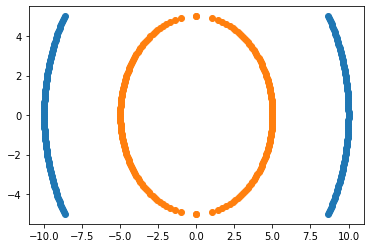

In [7]:
plt.scatter(y, x)
plt.scatter(y1, X1)

In [8]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1', 'X2'])
df1['Y'] =  0
df2 = pd.DataFrame(np.vstack([y1, X1]).T, columns = ['X1', 'X2'])
df2['Y'] = 1

In [10]:
df = pd.concat((df1, df2))

In [11]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [13]:
X = df.drop('Y', axis=1)
y = df['Y']

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(
    X, 
    y, 
    test_size=0.25, 
    random_state=0
    )

In [15]:
from sklearn.svm import SVC
model = SVC(
    kernel='linear'
)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.45

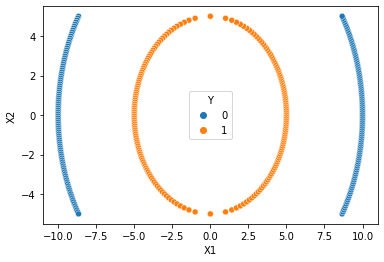

In [21]:
import seaborn as sns
sns.scatterplot(
    x = df.X1,
    y = df.X2,
    hue = df.Y
)
plt.show()

In [23]:
model_2 = SVC(
    kernel='rbf'
)
model_2.fit(X_train, y_train)

SVC()

In [25]:
y_pred = model_2.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [26]:
model_3 = SVC(
    kernel='poly'
)
model_3.fit(X_train, y_train)

SVC(kernel='poly')

In [27]:
y_pred = model_3.predict(X_test)
accuracy_score(y_test, y_pred)

0.59

Polynomial Kernel

In [28]:
df['X1_sqr'] = df.X1 ** 2
df['X2_sqr'] = df.X2 ** 2
df['X1X2'] = df.X1 * df.X2

In [29]:
X = df.drop('Y', axis=1)
y = df.Y

In [30]:
df.head()

,X1,X2,Y,X1_sqr,X2_sqr,X1X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [31]:
X_train, X_test, y_train, y_test = tts(
    X, 
    y, 
    test_size=0.25, 
    random_state=0
    )

3d Plots

In [32]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1',
    y = 'X2',
    z = 'X1X2',
    color = 'Y'
)
fig.show()

In [33]:
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1_sqr',
    y = 'X2',
    z = 'X1X2',
    color = 'Y'
)
fig.show()

Some Random Forest and Bagging Implementation

In [1]:
import seaborn as sns
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
data.day.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [4]:
data.time.cat.categories

Index(['Lunch', 'Dinner'], dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
data['time'] = encoder.fit_transform(data.time)

In [8]:
X = data.drop(columns = ['time'])
y = data.time

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [14]:
categorical_columns = ('sex', 'smoker', 'day')
numerical_columns = ('total_bill', 'tip', 'size')

In [16]:
num_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer([
    ('Numerical_Pileline', num_pipeline, numerical_columns),
    ('Categorical_Pipeline', cat_pipeline, categorical_columns)
]
)

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [18]:
X_train[0]

array([-0.79306155, -0.2580329 , -0.61214068,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
models = dict(
    randomForest = RandomForestClassifier(oob_score=True),
    supportVector = SVC(),
    decisionTree = DecisionTreeClassifier()
)

In [29]:
def evaluate_models(X_train, X_test, y_train, y_test, models: dict):
    report = {}
    for model in models:
        models[model].fit(X_train, y_train)

        y_pred = models[model].predict(X_test)

        report[model] = accuracy_score(y_test, y_pred).round(4)
    return report

In [30]:
evaluate_models(X_train, X_test, y_train, y_test, models)

{'randomForest': 0.9796, 'supportVector': 0.9796, 'decisionTree': 0.9796}

In [31]:
# random forest oob score
models['randomForest'].oob_score_

0.9487179487179487

In [36]:
param = dict(
    n_estimators = [10, 50, 100, 200],
    criterion = ['gini', 'entropy', 'log_loss'],
    max_depth = (3, 5, 10)
)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(oob_score=True)

random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param,
    scoring='accuracy',
    verbose=3    
)

In [38]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.923 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s


d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.923 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.923 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=nan total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.974 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50;

d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  w

[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=10;, score=0.923 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.949 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.974 total time=   0.0s


d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.923 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.974 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.923 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.949 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.949 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.974 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.923 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.974 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=5, n_

d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will b

[CV 4/5] END criterion=gini, max_depth=10, n_estimators=10;, score=0.949 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=10;, score=0.923 total time=   0.0s


RandomizedSearchCV(estimator=RandomForestClassifier(oob_score=True),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': (3, 5, 10),
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [39]:
random_cv.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}

In [40]:
random_cv.best_score_

0.9589743589743589

In [41]:
bestModel = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    oob_score=True,
    criterion='entropy'
)

In [42]:
bestModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, oob_score=True)

In [44]:
y_pred = bestModel.predict(X_test)

In [47]:
bestModel.oob_score_

0.9538461538461539

In [45]:
bestScore = accuracy_score(y_test, y_pred)
bestScore

0.9795918367346939